# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Proyecto 2: Análisis Exploratorio
### Reto 04: Predicción de compradores recurrentes: cuestionar la línea base - Negocios

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169
- Mario Antonio Guerra Morales, 21008
- David Jonathan Aragon Vasquez, 21053

**Curso:** Data Science  
**Sección:** 10  
**Grupo** 4  

---

Guatemala, 30 de septiembre de 2024


##### 🫳 Para la descarga del dataset de este reto, es necesario la creación de una cuenta dentro de Alibaba Cloud. Para facilitar este proceso se proporcionan los elementos a descargar en estos enlaces:
- Data_Format1: https://drive.google.com/file/d/1jgsaSM0wypPMUWaNlXy5s_kO0uiXNzES/view?usp=sharing
- Data_Format2: https://drive.google.com/file/d/1dnMeaon-ovASN2HEI1WSNfnw-7lyINAh/view?usp=drivesdk
- sample_submission.csv: 

#### 📑 Descripción del dataset

A continuación se describen las variables del dataset utilizadas para el análisis exploratorio:

- `user_id`: Identificador único para el comprador tipo numérica.
- `age_range`: Rango de edad del usuario donde:
    - 1 < 18
    - 2 para el rango [18, 24]
    - 3 para el rango [25, 29]
    - 4 para el rango [30, 34]
    - 5 para el rango [35, 39]
    - 6 para el rango [40, 49]
    - 7 y 8 para >= 50
    - 0 y NULL para desconocido
- `gender`: Género del usuario donde:
    - 0 es femenino
    - 1 es masculino
    - 2 y Null para desconocido
- `merchant_id`: Identificador único para el comerciante.

- `label`: Valores entre -1 y 1 donde:
    - 1 indica que `user_id` es un comprador recurrente de `merchant_id`
    - 0 es lo contrario a 1
    - -1 indica que `user_id` no es un nuevo cliente de `merchant_id`
    - Null se encuentra en los datos de prueba indicando que son para predecir.
- `activity_log`: Conjunto de registroos de interacción entre {**user_id**, **merchant_id**}, donde cada registro es una acción representada como ***item_id:category_id:brand_id:time_stamp:action_type***. Los elementos se separan con #
-  `item_id`: Identificador único para el artículo.
- `category_id`: Indentificador único para la categoría a la que pertenece el artículo
- `brand_id` Identificador único para la marca del artículo
- `time_stamp`: Fecha que ocurrió la acción
- `action_type`: Tipo de acción enumerado de 0 a 3 donde:
    - 0 es para clic
    - 1 es para agregar al carrito
    - 2 es para compra
    - 3 es paea agregar a favoritos

In [2]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.ticker as ticker
from imblearn.over_sampling import SMOTE

### 📩 Inciso 1. Descomprimir los datasets.

In [5]:
def unzipFile(zip_path):
    
    # Extraer en una carpeta con el mismo nombre que el archivo ZIP
    extract_to = os.path.splitext(zip_path)[0]
    
    # Verificar si la carpeta ya existe
    if os.path.exists(extract_to):
        print(f"La carpeta {extract_to} ya existe. No se descomprimirá el archivo.")
        return
    
    # Descomprimir el archivo
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    
    print(f"Archivo descomprimido en {extract_to}")

unzipFile('data/data_format1.zip')
unzipFile('data/data_format2.zip')

Archivo descomprimido en data/data_format1
Archivo descomprimido en data/data_format2


### 📩 Inciso 2. Carga de los datos

In [46]:
dataTest = pd.read_csv('data/data_format1/data_format1/train_format1.csv')
dataTrain = pd.read_csv('data/data_format2/data_format2/train_format2.csv')

### 🧹 Inciso 3. Preprocesamiento y limpieza de datos

In [7]:
dataTrain.head()

,user_id,age_range,gender,merchant_id,label,activity_log
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3


In [8]:
dataTrain.info()
dataTrain.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030723 entries, 0 to 7030722
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   age_range     float64
 2   gender        float64
 3   merchant_id   int64  
 4   label         int64  
 5   activity_log  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 321.8+ MB


user_id         7030723
age_range       7011343
gender          6969011
merchant_id     7030723
label           7030723
activity_log    7027748
dtype: int64

In [9]:
dataTrain.describe()

,user_id,age_range,gender,merchant_id,label
count,7.030723e+06,7.011343e+06,6.969011e+06,7.030723e+06,7.030723e+06
mean,2.120120e+05,3.106246e+00,3.036947e-01,2.455233e+03,-9.606277e-01
std,1.223200e+05,1.914345e+00,5.319517e-01,1.456245e+03,2.058154e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00
25%,1.055770e+05,2.000000e+00,0.000000e+00,1.176000e+03,-1.000000e+00
50%,2.126810e+05,3.000000e+00,0.000000e+00,2.404000e+03,-1.000000e+00
75%,3.175440e+05,4.000000e+00,1.000000e+00,3.743000e+03,-1.000000e+00
max,4.241700e+05,8.000000e+00,2.000000e+00,4.995000e+03,1.000000e+00


In [10]:
# Revisar si hay valores faltantes
print("Valores faltantes por columna:")
print(dataTrain.isnull().sum())

# Eliminar filas con valores faltantes
dataTrain_clean = dataTrain.dropna()

# Revisar duplicados
print(f"Duplicados en el dataset: {dataTrain.duplicated().sum()}")

# Eliminar filas duplicadas
dataTrain_clean = dataTrain.drop_duplicates()


Valores faltantes por columna:
user_id             0
age_range       19380
gender          61712
merchant_id         0
label               0
activity_log     2975
dtype: int64
Duplicados en el dataset: 0


In [11]:
# Procesamiento de cada fila de activity_log
def process_activity_log(row):
    row = str(row)
    
    # Separar las interacciones por '#'
    interactions = row.split('#')
    
    # Listas para almacenar los valores de las cinco columnas
    item_ids = []
    category_ids = []
    brand_ids = []
    time_stamps = []
    action_types = []
    
    # Procesar cada interacción
    for interaction in interactions:
        # Separar por ':'
        values = interaction.split(':')
        if len(values) == 5:
            item_ids.append(values[0])
            category_ids.append(values[1])
            brand_ids.append(values[2])
            time_stamps.append(values[3])
            action_types.append(values[4])
    
    # Devolver los valores separados por comas
    return pd.Series({
        'item_id': ','.join(item_ids),
        'category_id': ','.join(category_ids),
        'brand_id': ','.join(brand_ids),
        'time_stamp': ','.join(time_stamps),
        'action_type': ','.join(action_types)
    })

def process_in_chunks(df, chunk_size=10000):

    # Creacion de DataFrame vacío para almacenar los resultados
    result_df = pd.DataFrame()
    
    for start in range(0, df.shape[0], chunk_size):
        end = start + chunk_size
        print(f"Procesando filas de {start} a {end}...")
        
        # Obtener un chunk del DataFrame original
        chunk = df.iloc[start:end]
        
        # Aplicar la función process_activity_log al chunk
        processed_chunk = chunk['activity_log'].apply(process_activity_log)
        
        # Concatenar el chunk procesado con el chunk original
        chunk_with_data = pd.concat([chunk, processed_chunk], axis=1)
        
        # Agregar el chunk procesado al DataFrame final
        result_df = pd.concat([result_df, chunk_with_data])
    
    return result_df

dataTrain_activity_clean = process_in_chunks(dataTrain_clean, chunk_size=10000)

dataTrain_activity_clean.head()


Procesando filas de 0 a 10000...
Procesando filas de 10000 a 20000...
Procesando filas de 20000 a 30000...
Procesando filas de 30000 a 40000...
Procesando filas de 40000 a 50000...
Procesando filas de 50000 a 60000...
Procesando filas de 60000 a 70000...
Procesando filas de 70000 a 80000...
Procesando filas de 80000 a 90000...
Procesando filas de 90000 a 100000...
Procesando filas de 100000 a 110000...
Procesando filas de 110000 a 120000...
Procesando filas de 120000 a 130000...
Procesando filas de 130000 a 140000...
Procesando filas de 140000 a 150000...
Procesando filas de 150000 a 160000...
Procesando filas de 160000 a 170000...
Procesando filas de 170000 a 180000...
Procesando filas de 180000 a 190000...
Procesando filas de 190000 a 200000...
Procesando filas de 200000 a 210000...
Procesando filas de 210000 a 220000...
Procesando filas de 220000 a 230000...
Procesando filas de 230000 a 240000...
Procesando filas de 240000 a 250000...
Procesando filas de 250000 a 260000...
Procesand

,user_id,age_range,gender,merchant_id,label,activity_log,item_id,category_id,brand_id,time_stamp,action_type
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0,408895,1505,7370,1107,0
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...,"17235,954723,275437,548906,368206,480007,95472...","1604,1604,1604,1577,662,1604,1604,1505","4396,4396,4396,4396,4396,4396,4396,4396","0818,0818,0818,1031,0818,0818,0818,1024","0,0,0,0,0,0,0,0"
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...,"231901,231901,108465,231901,231901,840446,231901","662,662,662,662,662,1142,662","2758,2758,2758,2758,2758,2758,2758","0818,0818,0820,0820,0820,0820,0819","0,0,0,0,0,0,0"
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0,174142,821,6938,1027,0
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3,716371,1505,968,1024,3


In [ ]:
dataTrain_activity_clean.to_csv("data/train_cleaned_data.csv")

In [15]:
dataTrain_activity_clean = pd.read_csv("data/train_cleaned_data.csv")

dataTrain_activity_clean[['action_type', 'item_id']].head(20)

,action_type,item_id
0,0,408895
1,"0,0,0,0,0,0,0,0","17235,954723,275437,548906,368206,480007,95472..."
2,"0,0,0,0,0,0,0","231901,231901,108465,231901,231901,840446,231901"
3,0,174142
4,3,716371
5,0,996061
6,"0,0,0,3,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...","757713,757713,757713,718096,757713,613698,7577..."
7,3,951186
8,0,801430
9,"0,0,0,0,0","209509,699235,915857,209509,699235"


In [16]:
action_dict = {0: 'clicks', 1: 'add_to_cart', 2: 'purchases', 3: 'add_to_favorites'}

def process_row(row):
    if isinstance(row['action_type'], str):
        actions = list(map(int, row['action_type'].split(',')))
    else:
        actions = []  
    
    if isinstance(row['item_id'], str):
        items = row['item_id'].split(',')
    else:
        items = []  

    action_counts = {'clicks': 0, 'add_to_cart': 0, 'purchases': 0, 'add_to_favorites': 0}
    
    for action in actions:
        action_name = action_dict[action]
        action_counts[action_name] += 1
    
    total_actions = len(actions)
    
    return pd.Series({**action_counts, 'total_actions': total_actions})

dataTrain_activity_clean[['clicks', 'add_to_cart', 'purchases', 'add_to_favorites', 'total_actions']] = dataTrain_activity_clean.apply(process_row, axis=1)
print(dataTrain_activity_clean[['action_type', 'item_id', 'clicks', 'add_to_cart', 'purchases', 'add_to_favorites', 'total_actions']].head(20))


                                          action_type  \
0                                                   0   
1                                     0,0,0,0,0,0,0,0   
2                                       0,0,0,0,0,0,0   
3                                                   0   
4                                                   3   
5                                                   0   
6   0,0,0,3,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...   
7                                                   3   
8                                                   0   
9                                           0,0,0,0,0   
10                                                0,0   
11                                                  0   
12                                                0,0   
13                                                0,0   
14                                                  0   
15                                                  0   
16                             

In [17]:
def count_unique_items(row):
    if isinstance(row['item_id'], str):
        items = row['item_id'].split(',')
        return len(set(items))  
    return 0  

dataTrain_activity_clean['unique_item_count'] = dataTrain_activity_clean.apply(count_unique_items, axis=1)



In [18]:
dataTrain_activity_clean['time_stamp']

0                                                       1107
1                    0818,0818,0818,1031,0818,0818,0818,1024
2                         0818,0818,0820,0820,0820,0820,0819
3                                                       1027
4                                                       1024
                                 ...                        
7030718                                            0516,0524
7030719                                       1014,1014,1014
7030720                                       1016,1016,1016
7030721    1111,1111,1111,1110,1110,1110,1110,1110,1110,1...
7030722                                  1111,1111,1018,1018
Name: time_stamp, Length: 7030723, dtype: object

In [19]:
dataTrain_activity_clean.to_csv("data/train_cleaned_data.csv")

In [20]:
dataTrain_activity_clean = pd.read_csv("data/train_cleaned_data.csv")

### 0️⃣ Limpiando valores nulos

In [21]:
# Contar la cantidad de valores NaN por columna
valores_nulos_por_columna = dataTrain_activity_clean.isna().sum()

# Mostrar el total de valores nulos en el DataFrame
total_nulos = dataTrain_activity_clean.isna().sum().sum()

print(f"Total de filas: {len(dataTrain_activity_clean)}")
print(f"Total de valores nulos en el DataFrame: {total_nulos}")
print(f"Valores nulos por columna:\n{valores_nulos_por_columna}")


Total de filas: 7030723
Total de valores nulos en el DataFrame: 98942
Valores nulos por columna:
Unnamed: 0.1             0
Unnamed: 0               0
user_id                  0
age_range            19380
gender               61712
merchant_id              0
label                    0
activity_log          2975
item_id               2975
category_id           2975
brand_id              2975
time_stamp            2975
action_type           2975
clicks                   0
add_to_cart              0
purchases                0
add_to_favorites         0
total_actions            0
unique_item_count        0
dtype: int64


In [22]:
dataTrain_activity_clean['age_range'].fillna(0, inplace=True)
valores_nulos_por_columna = dataTrain_activity_clean.isna().sum()
total_nulos = dataTrain_activity_clean.isna().sum().sum()

print(f"Total de filas: {len(dataTrain_activity_clean)}")
print(f"Total de valores nulos en el DataFrame después del reemplazo: {total_nulos}")
print(f"Valores nulos por columna después del reemplazo:\n{valores_nulos_por_columna}")


C:\Users\lijv1.LINDA_HP\AppData\Local\Temp\ipykernel_14204\2860219317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataTrain_activity_clean['age_range'].fillna(0, inplace=True)


Total de filas: 7030723
Total de valores nulos en el DataFrame después del reemplazo: 79562
Valores nulos por columna después del reemplazo:
Unnamed: 0.1             0
Unnamed: 0               0
user_id                  0
age_range                0
gender               61712
merchant_id              0
label                    0
activity_log          2975
item_id               2975
category_id           2975
brand_id              2975
time_stamp            2975
action_type           2975
clicks                   0
add_to_cart              0
purchases                0
add_to_favorites         0
total_actions            0
unique_item_count        0
dtype: int64


In [23]:
dataTrain_activity_clean['gender'].fillna(2, inplace=True)
valores_nulos_por_columna = dataTrain_activity_clean.isna().sum()
total_nulos = dataTrain_activity_clean.isna().sum().sum()

print(f"Total de filas: {len(dataTrain_activity_clean)}")
print(f"Total de valores nulos en el DataFrame después del reemplazo: {total_nulos}")
print(f"Valores nulos por columna después del reemplazo:\n{valores_nulos_por_columna}")


C:\Users\lijv1.LINDA_HP\AppData\Local\Temp\ipykernel_14204\3079583989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataTrain_activity_clean['gender'].fillna(2, inplace=True)


Total de filas: 7030723
Total de valores nulos en el DataFrame después del reemplazo: 17850
Valores nulos por columna después del reemplazo:
Unnamed: 0.1            0
Unnamed: 0              0
user_id                 0
age_range               0
gender                  0
merchant_id             0
label                   0
activity_log         2975
item_id              2975
category_id          2975
brand_id             2975
time_stamp           2975
action_type          2975
clicks                  0
add_to_cart             0
purchases               0
add_to_favorites        0
total_actions           0
unique_item_count       0
dtype: int64


In [24]:
dataTrain_activity_clean_sin_nulos = dataTrain_activity_clean.dropna()
print(f"Nuevo total de filas: {len(dataTrain_activity_clean_sin_nulos)}")

Nuevo total de filas: 7027748


In [25]:
valores_nulos_por_columna = dataTrain_activity_clean.isna().sum()
total_nulos = dataTrain_activity_clean.isna().sum().sum()

print(f"Total de filas: {len(dataTrain_activity_clean)}")
print(f"Total de valores nulos en el DataFrame después del reemplazo: {total_nulos}")
print(f"Valores nulos por columna después del reemplazo:\n{valores_nulos_por_columna}")


Total de filas: 7030723
Total de valores nulos en el DataFrame después del reemplazo: 17850
Valores nulos por columna después del reemplazo:
Unnamed: 0.1            0
Unnamed: 0              0
user_id                 0
age_range               0
gender                  0
merchant_id             0
label                   0
activity_log         2975
item_id              2975
category_id          2975
brand_id             2975
time_stamp           2975
action_type          2975
clicks                  0
add_to_cart             0
purchases               0
add_to_favorites        0
total_actions           0
unique_item_count       0
dtype: int64


In [26]:
dataTrain_activity_clean_sin_nulos = dataTrain_activity_clean_sin_nulos.drop('Unnamed: 0', axis=1)

In [27]:
dataTrain_activity_clean_sin_nulos.head()


,Unnamed: 0.1,user_id,age_range,gender,merchant_id,label,activity_log,item_id,category_id,brand_id,time_stamp,action_type,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count
0,0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0,408895,1505,7370,1107,0,1,0,0,0,1,1
1,1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...,"17235,954723,275437,548906,368206,480007,95472...","1604,1604,1604,1577,662,1604,1604,1505","4396,4396,4396,4396,4396,4396,4396,4396","0818,0818,0818,1031,0818,0818,0818,1024","0,0,0,0,0,0,0,0",8,0,0,0,8,7
2,2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...,"231901,231901,108465,231901,231901,840446,231901","662,662,662,662,662,1142,662","2758,2758,2758,2758,2758,2758,2758","0818,0818,0820,0820,0820,0820,0819","0,0,0,0,0,0,0",7,0,0,0,7,3
3,3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0,174142,821,6938,1027,0,1,0,0,0,1,1
4,4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3,716371,1505,968,1024,3,0,0,0,1,1,1


In [28]:
dataTrain_activity_clean_sin_nulos.to_csv("data/train_cleaned_data.csv")

## 📈 Análisis Exploratorio

In [29]:
dataTrain_activity_clean = pd.read_csv("data/train_cleaned_data.csv")

In [30]:
dataTrain_activity_clean.head()

,Unnamed: 0,Unnamed: 0.1,user_id,age_range,gender,merchant_id,label,activity_log,item_id,category_id,brand_id,time_stamp,action_type,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count
0,0,0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0,408895,1505,7370,1107,0,1,0,0,0,1,1
1,1,1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...,"17235,954723,275437,548906,368206,480007,95472...","1604,1604,1604,1577,662,1604,1604,1505","4396,4396,4396,4396,4396,4396,4396,4396","0818,0818,0818,1031,0818,0818,0818,1024","0,0,0,0,0,0,0,0",8,0,0,0,8,7
2,2,2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...,"231901,231901,108465,231901,231901,840446,231901","662,662,662,662,662,1142,662","2758,2758,2758,2758,2758,2758,2758","0818,0818,0820,0820,0820,0820,0819","0,0,0,0,0,0,0",7,0,0,0,7,3
3,3,3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0,174142,821,6938,1027,0,1,0,0,0,1,1
4,4,4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3,716371,1505,968,1024,3,0,0,0,1,1,1


In [31]:
for column in dataTrain_activity_clean.columns:
    if column == 'Unnamed: 0':
        dataTrain_activity_clean = dataTrain_activity_clean.drop('Unnamed: 0', axis=1)

In [32]:
dataTrain_activity_clean.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,label,activity_log,item_id,category_id,brand_id,time_stamp,action_type,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count
0,0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0,408895,1505,7370,1107,0,1,0,0,0,1,1
1,1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...,"17235,954723,275437,548906,368206,480007,95472...","1604,1604,1604,1577,662,1604,1604,1505","4396,4396,4396,4396,4396,4396,4396,4396","0818,0818,0818,1031,0818,0818,0818,1024","0,0,0,0,0,0,0,0",8,0,0,0,8,7
2,2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...,"231901,231901,108465,231901,231901,840446,231901","662,662,662,662,662,1142,662","2758,2758,2758,2758,2758,2758,2758","0818,0818,0820,0820,0820,0820,0819","0,0,0,0,0,0,0",7,0,0,0,7,3
3,3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0,174142,821,6938,1027,0,1,0,0,0,1,1
4,4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3,716371,1505,968,1024,3,0,0,0,1,1,1


In [33]:
total_filas = len(dataTrain_activity_clean)
print(f"Total de filas: {total_filas}")

Total de filas: 7027748


In [34]:
num_columns = dataTrain_activity_clean.shape[1]-1 # Se elimina la primera columna, que es un índice para la cantidad de filas.

print(f"El DataFrame tiene un total de {num_columns} columnas.")

El DataFrame tiene un total de 17 columnas.


In [35]:
categorical_columns = dataTrain_activity_clean[["user_id", "age_range", "gender", "merchant_id", "label"]]

# Generar tablas de frecuencia para cada variable categórica
for col in categorical_columns.columns:
    frequency_table = dataTrain_activity_clean[col].value_counts().nlargest(10).reset_index()
    frequency_table.columns = [col, 'frequency']  
    
    frequency_table['percentage'] = (frequency_table['frequency'] / frequency_table['frequency'].sum()) * 100

    print(f"Frecuencia de valores en la columna {col} (Top 10):\n")
    print(tabulate(frequency_table, headers='keys', tablefmt='rounded_grid', showindex=False))
    print("\n")


Frecuencia de valores en la columna user_id (Top 10):

╭───────────┬─────────────┬──────────────╮
│   user_id │   frequency │   percentage │
├───────────┼─────────────┼──────────────┤
│    131476 │        1049 │     13.324   │
├───────────┼─────────────┼──────────────┤
│    185538 │         828 │     10.517   │
├───────────┼─────────────┼──────────────┤
│    181513 │         812 │     10.3137  │
├───────────┼─────────────┼──────────────┤
│    306686 │         777 │      9.86917 │
├───────────┼─────────────┼──────────────┤
│    383810 │         769 │      9.76756 │
├───────────┼─────────────┼──────────────┤
│     70625 │         747 │      9.48812 │
├───────────┼─────────────┼──────────────┤
│    217644 │         745 │      9.46272 │
├───────────┼─────────────┼──────────────┤
│     92057 │         735 │      9.3357  │
├───────────┼─────────────┼──────────────┤
│    220326 │         711 │      9.03086 │
├───────────┼─────────────┼──────────────┤
│    264205 │         700 │      8.89115 │

In [36]:
# Función para descomponer una columna con valores separados por comas
def explode_column(df, column_name):
    df[column_name] = df[column_name].str.split(',')
    exploded_df = df.explode(column_name)
    return exploded_df

columns_to_explode = ["item_id", "category_id", "brand_id", "time_stamp", "action_type"]

frequency_tables = {col: pd.DataFrame() for col in columns_to_explode}

# Leer el archivo CSV en fragmentos
chunksize = 100000  # Ajusta este tamaño según la memoria disponible
for chunk in pd.read_csv("data/train_cleaned_data.csv", chunksize=chunksize):
    for col in columns_to_explode:
        # Descomponer la columna en filas individuales
        exploded_df = explode_column(chunk.copy(), col)
        
        # Calcular la tabla de frecuencia
        frequency_table = exploded_df[col].value_counts().nlargest(10).reset_index()
        frequency_table.columns = [col, 'frequency']
        
        # Calcular el porcentaje
        frequency_table['percentage'] = (frequency_table['frequency'] / frequency_table['frequency'].sum()) * 100
        
        # Agregar los resultados a la tabla correspondiente en el diccionario
        frequency_tables[col] = pd.concat([frequency_tables[col], frequency_table], ignore_index=True)

# Imprimir las tablas finales utilizando tabulate
for col in columns_to_explode:
    final_table = frequency_tables[col].groupby(col, as_index=False).agg({'frequency': 'sum'})
    final_table['percentage'] = (final_table['frequency'] / final_table['frequency'].sum()) * 100
    
    print(f"Tabla de frecuencia consolidada para {col} (Top 10):\n")
    print(tabulate(final_table.nlargest(10, 'frequency'), headers='keys', tablefmt='rounded_grid', showindex=False))
    print("\n")


Tabla de frecuencia consolidada para item_id (Top 10):

╭───────────┬─────────────┬──────────────╮
│   item_id │   frequency │   percentage │
├───────────┼─────────────┼──────────────┤
│     67897 │      162659 │     35.6466  │
├───────────┼─────────────┼──────────────┤
│    783997 │       91219 │     19.9906  │
├───────────┼─────────────┼──────────────┤
│    636863 │       35170 │      7.70748 │
├───────────┼─────────────┼──────────────┤
│    631714 │       21147 │      4.63435 │
├───────────┼─────────────┼──────────────┤
│     61518 │       15326 │      3.35868 │
├───────────┼─────────────┼──────────────┤
│    559967 │       12303 │      2.69619 │
├───────────┼─────────────┼──────────────┤
│    770668 │        8974 │      1.96665 │
├───────────┼─────────────┼──────────────┤
│    628774 │        5953 │      1.3046  │
├───────────┼─────────────┼──────────────┤
│   1024557 │        5884 │      1.28947 │
├───────────┼─────────────┼──────────────┤
│    269715 │        4934 │      1.08128 

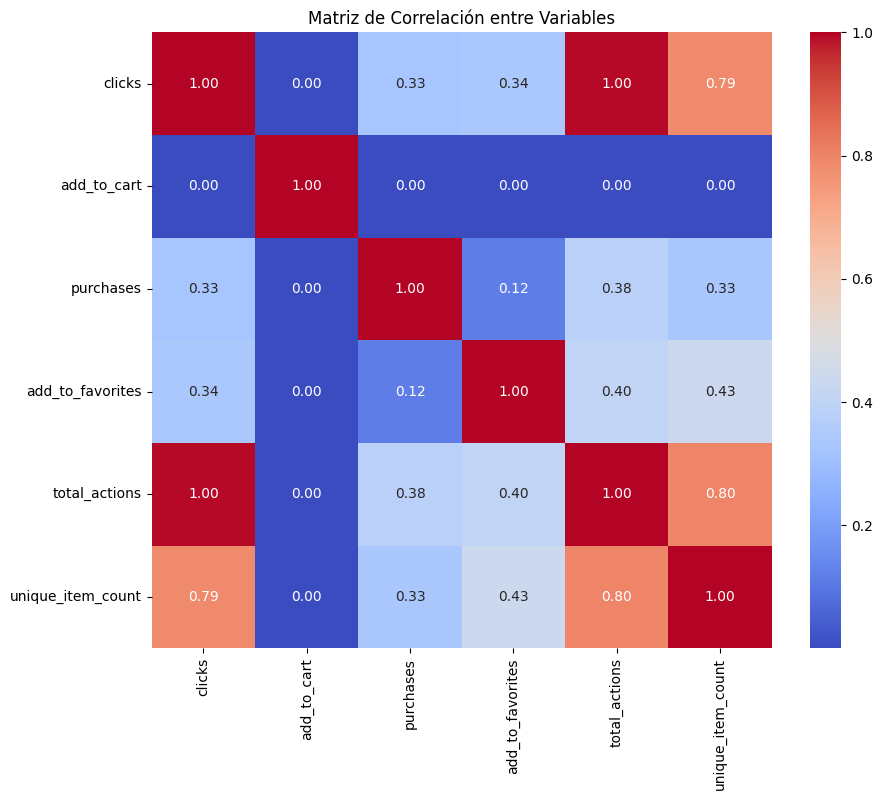

In [37]:
num_cols = ['clicks', 'add_to_cart', 'purchases', 'add_to_favorites', 'total_actions', 'unique_item_count']

# Convertir las columnas de valores separados por comas a valores numéricos tomando el primer valor
for col in ['item_id', 'category_id', 'brand_id', 'action_type']:
    dataTrain_activity_clean[col] = dataTrain_activity_clean[col].apply(lambda x: int(x.split(',')[0]) if isinstance(x, str) else x)

correlation_matrix = dataTrain_activity_clean[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.show()

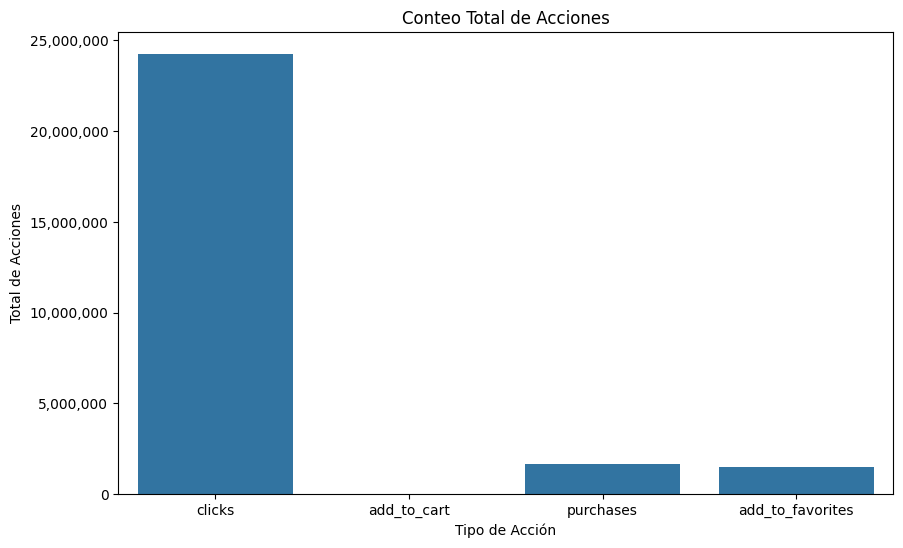

In [38]:
plt.figure(figsize=(10, 6))
action_counts = dataTrain_activity_clean[['clicks', 'add_to_cart', 'purchases', 'add_to_favorites']].sum()

# Crear la gráfica de barras
sns.barplot(x=action_counts.index, y=action_counts.values)

# Ajustar el título y las etiquetas
plt.title('Conteo Total de Acciones')
plt.xlabel('Tipo de Acción')
plt.ylabel('Total de Acciones')

# Formatear el eje Y para que no muestre notación científica
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

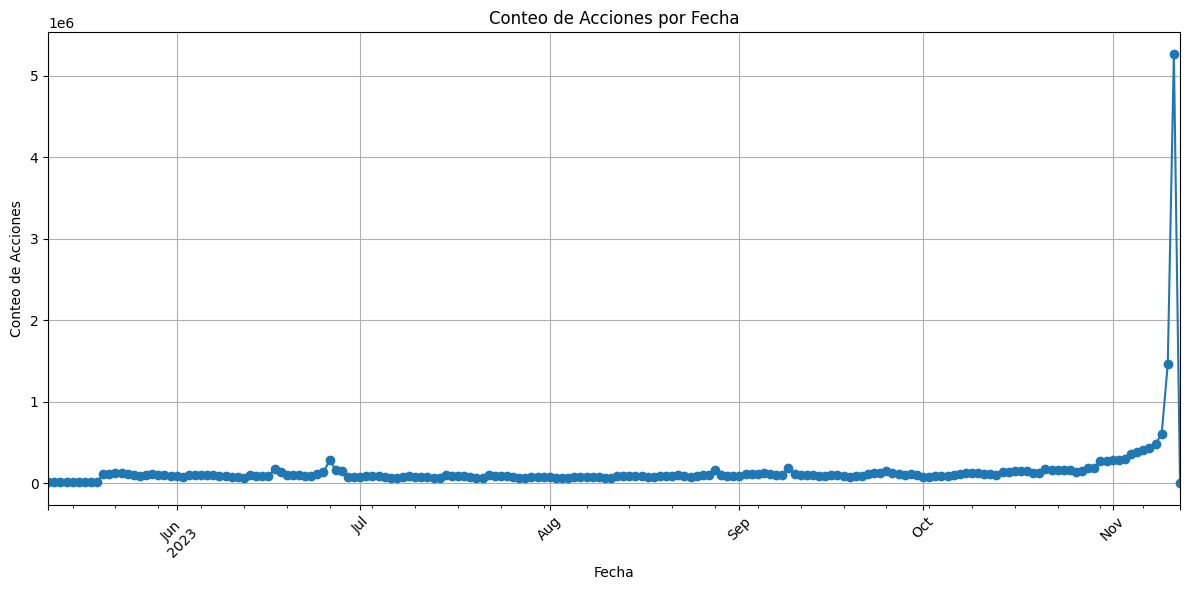

In [39]:
def convert_to_datetime(row):
    if isinstance(row, str):  # Verifica si el valor es una cadena
        dates = row.split(',')
        return pd.to_datetime([f'2023-{date[:2]}-{date[2:]}' for date in dates if date.isdigit()], errors='coerce')
    return pd.NaT  # Devuelve NaT para valores no válidos

dataTrain_activity_clean['time_stamp'] = dataTrain_activity_clean['time_stamp'].apply(convert_to_datetime)
exploded_df = dataTrain_activity_clean.explode('time_stamp')
date_counts = exploded_df['time_stamp'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
date_counts.plot(kind='line', marker='o')
plt.title('Conteo de Acciones por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Conteo de Acciones')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


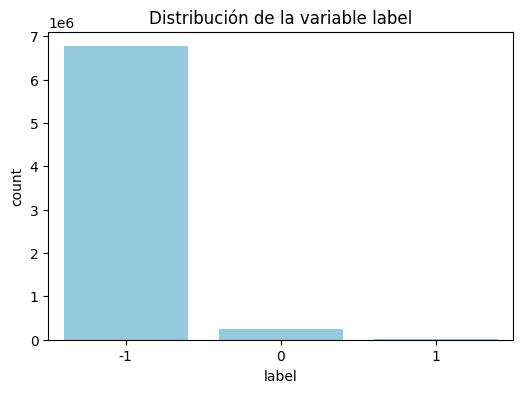

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=dataTrain_activity_clean, color='skyblue')
plt.title('Distribución de la variable label')
plt.show()


<Figure size 1000x600 with 0 Axes>

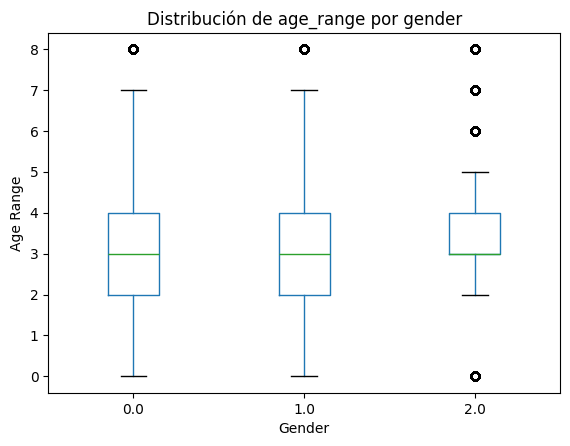

In [41]:
plt.figure(figsize=(10,6))
dataTrain_activity_clean.boxplot(column='age_range', by='gender', grid=False)
plt.title('Distribución de age_range por gender')
plt.suptitle('')  
plt.xlabel('Gender')
plt.ylabel('Age Range')
plt.show()

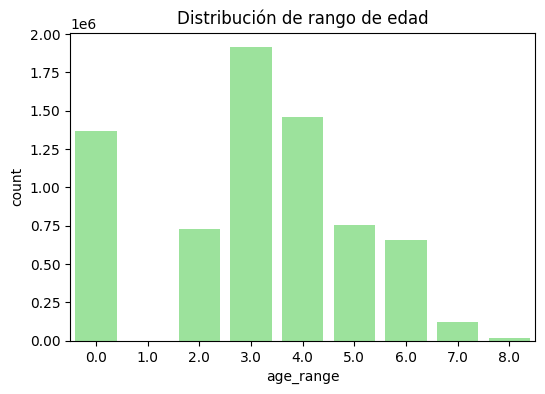

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(x='age_range', data=dataTrain_activity_clean, color='lightgreen')
plt.title('Distribución de rango de edad')
plt.show()


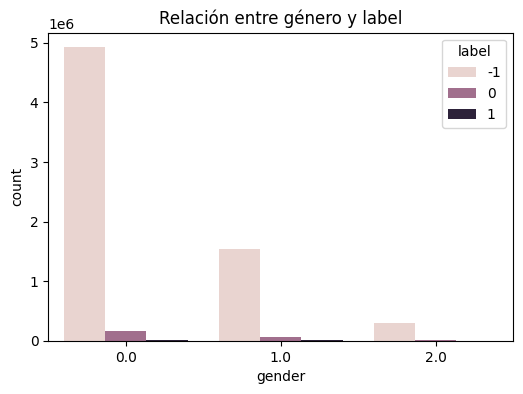

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='label', data=dataTrain_activity_clean)
plt.title('Relación entre género y label')
plt.show()


<Figure size 1000x600 with 0 Axes>

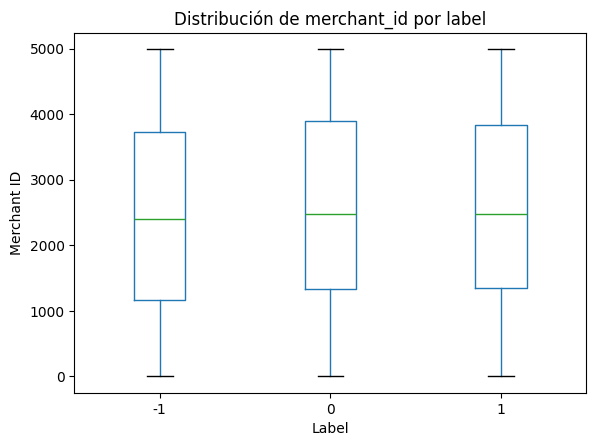

In [48]:
# Boxplot de 'merchant_id' por 'label' (si hay pocos merchant_id)
plt.figure(figsize=(10,6))
dataTrain_activity_clean.boxplot(column='merchant_id', by='label', grid=False)
plt.title('Distribución de merchant_id por label')
plt.suptitle('')
plt.xlabel('Label')
plt.ylabel('Merchant ID')
plt.show()

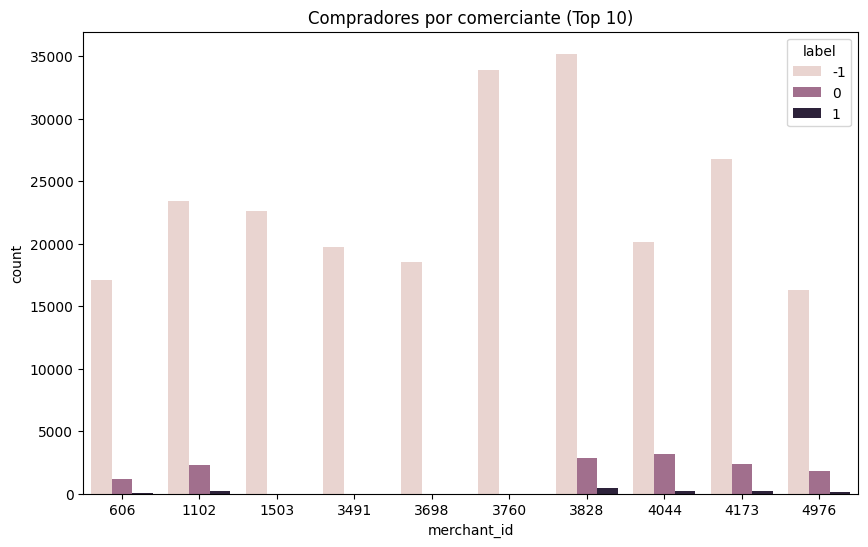

In [49]:
plt.figure(figsize=(10,6))
top_merchants = dataTrain_activity_clean['merchant_id'].value_counts().nlargest(10).index
sns.countplot(x='merchant_id', hue='label', data=dataTrain_activity_clean[dataTrain_activity_clean['merchant_id'].isin(top_merchants)])
plt.title('Compradores por comerciante (Top 10)')
plt.show()


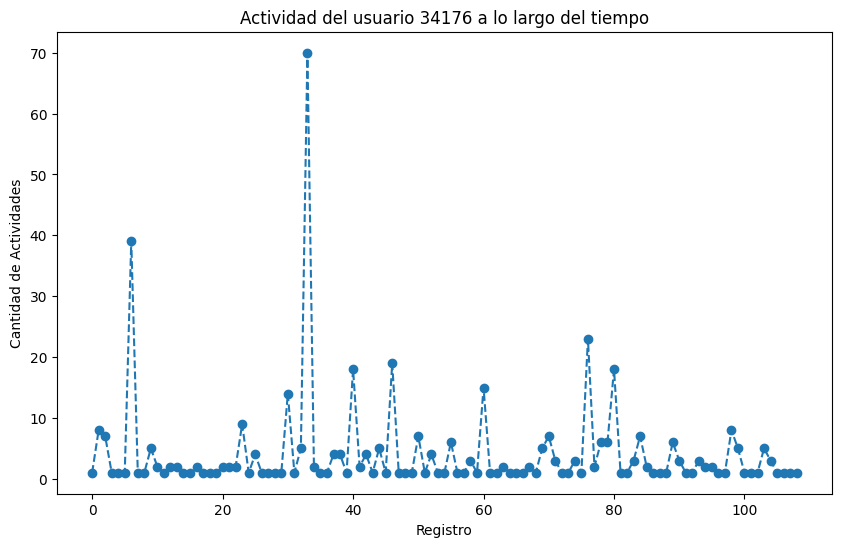

In [50]:
# Visualizar las actividades de un usuario específico
user_sample = dataTrain_activity_clean[dataTrain_activity_clean['user_id'] == 34176].copy() 

# Calcular la cantidad de actividades para cada registro
user_sample['activity_count'] = user_sample['activity_log'].apply(lambda x: len(str(x).split('#')))

# Muestra las actividades de este usuario a lo largo del tiempo
plt.figure(figsize=(10,6))
plt.plot(user_sample.index, user_sample['activity_count'], marker='o', linestyle='--')
plt.title(f'Actividad del usuario {34176} a lo largo del tiempo')
plt.xlabel('Registro')
plt.ylabel('Cantidad de Actividades')
plt.show()


### 📊 Balanceo de informacion como preparacion para los modelos

In [51]:
dataTrain_activity_to_balance = dataTrain_activity_clean.drop('activity_log', axis=1)

In [52]:
dataTrain_activity_to_balance = dataTrain_activity_to_balance.drop('action_type', axis=1)
dataTrain_activity_to_balance = dataTrain_activity_to_balance.drop('category_id', axis=1)
dataTrain_activity_to_balance = dataTrain_activity_to_balance.drop('item_id', axis=1)
dataTrain_activity_to_balance = dataTrain_activity_to_balance.drop('time_stamp', axis=1)

In [53]:
dataTrain_activity_to_balance = dataTrain_activity_to_balance.drop('brand_id', axis=1)

In [54]:
dataTrain_activity_to_balance.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,label,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count
0,0,34176,6.0,0.0,944,-1,1,0,0,0,1,1
1,1,34176,6.0,0.0,412,-1,8,0,0,0,8,7
2,2,34176,6.0,0.0,1945,-1,7,0,0,0,7,3
3,3,34176,6.0,0.0,4752,-1,1,0,0,0,1,1
4,4,34176,6.0,0.0,643,-1,0,0,0,1,1,1


In [55]:
X = dataTrain_activity_to_balance.drop('label', axis=1)
y = dataTrain_activity_to_balance['label']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

data_balanceado = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote, columns=['label'])], axis=1)
print(data_balanceado['label'].value_counts())

label
-1    6766937
 0    6766937
 1    6766937
Name: count, dtype: int64


In [56]:
data_balanceado.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
0,0,34176,6.0,0.0,944,1,0,0,0,1,1,-1
1,1,34176,6.0,0.0,412,8,0,0,0,8,7,-1
2,2,34176,6.0,0.0,1945,7,0,0,0,7,3,-1
3,3,34176,6.0,0.0,4752,1,0,0,0,1,1,-1
4,4,34176,6.0,0.0,643,0,0,0,1,1,1,-1


In [57]:
categorical_columns = data_balanceado[["label"]]

for col in categorical_columns.columns:
    frequency_table = data_balanceado[col].value_counts().nlargest(10).reset_index()
    frequency_table.columns = [col, 'frequency']  
    frequency_table['percentage'] = (frequency_table['frequency'] / frequency_table['frequency'].sum()) * 100
    print(f"Frecuencia de valores en la columna {col} (Top 10):\n")
    print(tabulate(frequency_table, headers='keys', tablefmt='rounded_grid', showindex=False))
    print("\n")

Frecuencia de valores en la columna label (Top 10):

╭─────────┬─────────────┬──────────────╮
│   label │   frequency │   percentage │
├─────────┼─────────────┼──────────────┤
│      -1 │ 6.76694e+06 │      33.3333 │
├─────────┼─────────────┼──────────────┤
│       0 │ 6.76694e+06 │      33.3333 │
├─────────┼─────────────┼──────────────┤
│       1 │ 6.76694e+06 │      33.3333 │
╰─────────┴─────────────┴──────────────╯


